<a href="https://colab.research.google.com/github/taniajasmin/OCR-for-license-plate-detection/blob/main/OCR_on_licenseplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone YOLO Repository

In [ ]:
# Clone YOLO repository containing the necessary files
!git clone https://github.com/pjreddie/darknet.git

# List the files to verify if they are present
!ls darknet/cfg  # Should show yolov3.cfg
!ls darknet/data  # Should show coco.names

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 6.91 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
alexnet.cfg	   extraction.cfg		 resnet34.cfg	       writing.cfg
cifar.cfg	   extraction.conv.cfg		 resnet50.cfg	       yolo9000.cfg
cifar.test.cfg	   go.cfg			 resnext101-32x4d.cfg  yolov1.cfg
coco.data	   go.test.cfg			 resnext152-32x4d.cfg  yolov1-tiny.cfg
combine9k.data	   gru.cfg			 resnext50.cfg	       yolov2.cfg
darknet19_448.cfg  imagenet1k.data		 rnn.cfg	       yolov2-tiny.cfg
darknet19.cfg	   imagenet22k.dataset		 rnn.train.cfg	       yolov2-tiny-voc.cfg
darknet53_448.cfg  imagenet9k.hierarchy.dataset  strided.cfg	       yolov2-voc.cfg
darknet53.cfg	   jnet-conv.cfg		 t1.test.cfg	       yolov3.cfg
darknet9000.cfg    openimages.data		 tiny.cfg	       yolov3-openimages.cfg
darknet.cfg	   resnet101.cfg		 vgg-16.cfg	       yolov3-spp.

In [ ]:
# Downloading YOLOv3 weights from the official source
!wget https://pjreddie.com/media/files/yolov3.weights -O /content/darknet/yolov3.weights

--2025-03-13 04:55:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/darknet/yolov3.weights’

/content/darknet/yo 100%[===================>] 236.52M  16.0MB/s    in 16s     

2025-03-13 04:56:12 (15.2 MB/s) - ‘/content/darknet/yolov3.weights’ saved [248007048/248007048]



In [ ]:
import cv2

# Paths to YOLO files
yolo_net_config = '/content/darknet/cfg/yolov3.cfg'  # Path to yolov3.cfg
yolo_net_weights = '/content/darknet/yolov3.weights'  # Path to yolov3.weights
coco_names = '/content/darknet/data/coco.names'  # Path to coco.names

# Load YOLO model
net = cv2.dnn.readNet(yolo_net_weights, yolo_net_config)

# Load class labels
with open(coco_names, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Get YOLO output layer names
layer_names = net.getLayerNames()

# Correct way to get output layers
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

print("Output layers:", output_layers)

Output layers: ['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
# Path to the zip file in your Google Drive
zip_file_path = '/car_license_images.zip'

# Path to unzip the content
unzip_dir = '/content/car_license_images/'

# Unzip the file
!unzip {zip_file_path} -d {unzip_dir}

Archive:  /car_license_images.zip
  inflating: /content/car_license_images/images/alpr_lp_1.jpg  
  inflating: /content/car_license_images/images/alpr_lp_10.jpg  
  inflating: /content/car_license_images/images/alpr_lp_100.jpg  
  inflating: /content/car_license_images/images/alpr_lp_101.jpg  
  inflating: /content/car_license_images/images/alpr_lp_102.jpg  
  inflating: /content/car_license_images/images/alpr_lp_103.jpg  
  inflating: /content/car_license_images/images/alpr_lp_104.jpg  
  inflating: /content/car_license_images/images/alpr_lp_105.jpg  
  inflating: /content/car_license_images/images/alpr_lp_106.jpg  
  inflating: /content/car_license_images/images/alpr_lp_107.jpg  
  inflating: /content/car_license_images/images/alpr_lp_108.jpg  
  inflating: /content/car_license_images/images/alpr_lp_109.jpg  
  inflating: /content/car_license_images/images/alpr_lp_11.jpg  
  inflating: /content/car_license_images/images/alpr_lp_110.jpg  
  inflating: /content/car_license_images/image

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
image_dir = '/content/car_license_images/images'

# List all files in the directory and filter by image extensions
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

total_images = len(image_files)
print(f'Total number of images: {total_images}')

Total number of images: 201


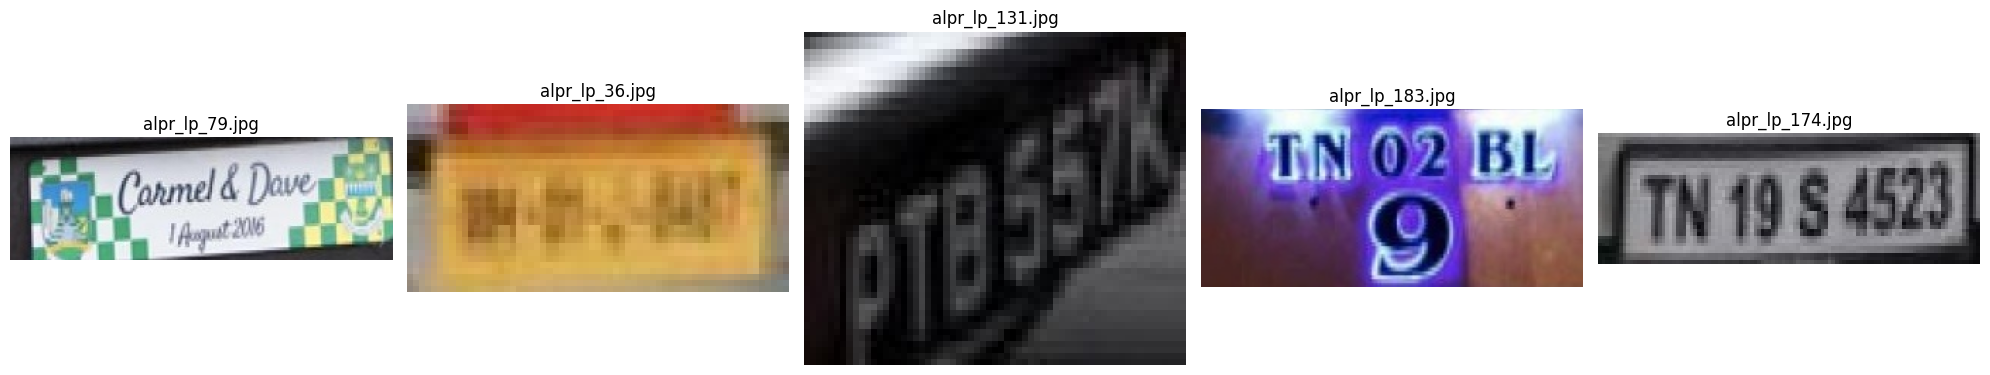

In [ ]:
import matplotlib.image as mpimg

fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i, ax in enumerate(axes):
    if i < len(image_files):
        img_path = os.path.join(image_dir, image_files[i])
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')  # Hide the axes
        ax.set_title(image_files[i])

plt.tight_layout()
plt.show()

#  Perform OCR on Dataset Images

In [ ]:
# !apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,757 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract
from PIL import Image

In [ ]:
# Function to perform OCR on image
def perform_ocr(image_path):
    # Open the image using PIL
    img = Image.open(image_path)
    # Perform OCR using Tesseract
    text = pytesseract.image_to_string(img)
    return text

# Test OCR on the first few images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(image_dir, image_files[i])
    text = perform_ocr(img_path)
    print(f'OCR result for {image_files[i]}: {text}')

OCR result for alpr_lp_79.jpg:  

A 6. Carmel & Pave

OCR result for alpr_lp_36.jpg:  

OCR result for alpr_lp_131.jpg: 
OCR result for alpr_lp_183.jpg: ai

OCR result for alpr_lp_174.jpg: 


Enhance image before OCR

In [ ]:
# Preprocessing function with enhancements
def preprocess_image(image_path):

    img = cv2.imread(image_path)
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to segment text from background
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 11, 2)  # Adjust parameters as needed

    # Optional: Apply morphological operations to clean up the image
    kernel = np.ones((3, 3), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

    return thresh

In [ ]:
def perform_ocr(image_path):
    preprocessed_img = preprocess_image(image_path)
    # Perform OCR using Tesseract
    text = pytesseract.image_to_string(preprocessed_img, config='--psm 8')
    return text

In [ ]:
# # Preprocessing function
# def preprocess_image(image_path):
#     # Load image
#     img = cv2.imread(image_path)
#     # Convert image to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     # Apply binary thresholding (increases contrast between text and background)
#     _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
#     # Optional: Apply dilation or erosion to clean the image
#     kernel = np.ones((3, 3), np.uint8)
#     thresh = cv2.dilate(thresh, kernel, iterations=1)
#     return thresh

In [ ]:
# Test OCR on the first few images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(image_dir, image_files[i])
    text = perform_ocr(img_path)
    print(f'OCR result for {image_files[i]}: {text}')

OCR result for alpr_lp_79.jpg: ffetapoendd Daa

OCR result for alpr_lp_36.jpg: Tea |

OCR result for alpr_lp_131.jpg: ey

OCR result for alpr_lp_183.jpg: ON

OCR result for alpr_lp_174.jpg: (7ai98 4533



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


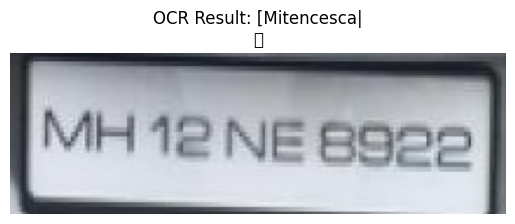

Extracted Text: [Mitencesca|



In [ ]:
# Image directory and file selection
image_dir = '/content/car_license_images/images'
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select an image (e.g., the first image)
selected_image_file = image_files[5]
selected_image_path = os.path.join(image_dir, selected_image_file)

# Perform OCR and display results
extracted_text = perform_ocr(selected_image_path)

# Display the image and extracted text
img = cv2.imread(selected_image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title(f"OCR Result: {extracted_text}")
plt.axis('off')  # Hide axes
plt.show()

print(f"Extracted Text: {extracted_text}")